# **Image Reconstruction Using Different Filter**

AxesImage(size=(64, 64))


/usr/local/lib/python3.10/dist-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


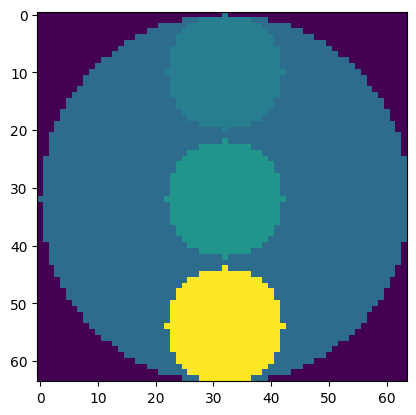

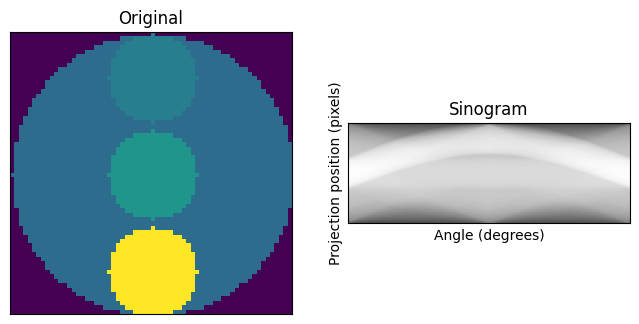

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import radon,iradon
from skimage.color import rgb2gray
import cv2
from google.colab.patches import cv2_imshow
ii=plt.imread("/content/nuclrat1.png")
i1=Image.open("/content/nuclrat1.png")
i = rgb2gray(ii)
image=np.array(i)
a=np.max(image)
a=round(a,6)

b=np.min(image)
b=round(b,6)

print(plt.imshow(image))
theta = np.arange(0,180,0.25)

sinogram= radon(image, theta=theta, circle=True)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8, 4.5))
ax1.imshow(image)
ax1.set_title('Original')
ax1.set_yticks([])
ax1.set_xticks([])
ax2.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(-90, 90, 0, sinogram.shape[0]))
ax2.set_title('Sinogram')
ax2.set_xlabel('Angle (degrees)')
ax2.set_ylabel('Projection position (pixels)')
ax2.set_yticks([])
ax2.set_xticks([])
plt.show()





**Filter with their average area count(ratio of count non zero value in reconstcted image to image size or total no. of pixels**

## **RAM-LAK Filter**

1/NMAX value  0.0039813091822284265


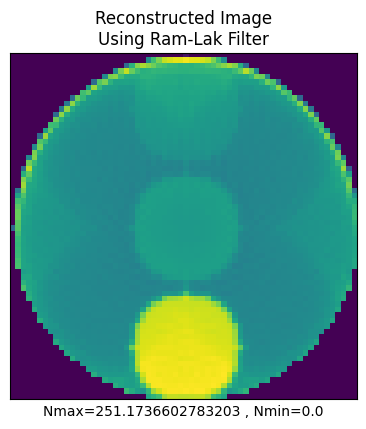

average_area= 0.782958984375


In [10]:
from skimage.transform import radon, rescale
recon_ramp=iradon(sinogram, theta, filter_name='ramp')
a=np.max(recon_ramp)
b=np.min(recon_ramp)
a=round(a,5)
b=round(b,5)

recon_ramp=recon_ramp*255
a=np.max(recon_ramp)
b=np.min(recon_ramp)
a=round(a,5)
b=round(b,5)
print("1/NMAX value ",1/np.max(recon_ramp))



fig,(ax3) = plt.subplots(1,1,figsize=(8, 4.5))
ax3.imshow(recon_ramp)
ax3.set_title('Reconstructed Image\nUsing Ram-Lak Filter')
ax3.set_xlabel(f"Nmax={a} , Nmin={b}")
ax3.set_yticks([])
ax3.set_xticks([])
plt.show()

average_area =np.count_nonzero(recon_ramp)/recon_ramp.size
print("average_area=",average_area)

## **Shepp-Logan Filter**

1/NMAX value  0.003992760441014331


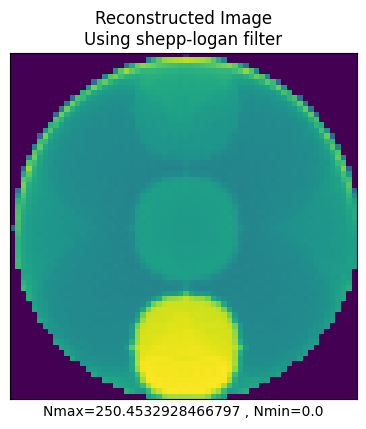

average_area= 0.782958984375


In [11]:
recon_sine=iradon(sinogram, theta,filter_name= 'shepp-logan')
recon_sine=recon_sine*255
a=np.max(recon_sine)
b=np.min(recon_sine)
a=round(a,5)
b=round(b,5)
print("1/NMAX value ",1/np.max(recon_sine))
fig,(ax3) = plt.subplots(1,1, figsize=(8, 4.5))
ax3.imshow(recon_sine)
ax3.set_title('Reconstructed Image\nUsing shepp-logan filter')
ax3.set_xlabel(f"Nmax={a} , Nmin={b}")
ax3.set_yticks([])
ax3.set_xticks([])
plt.show()
average_area =np.count_nonzero(recon_sine)/np.count_nonzero(image)
print("average_area=",average_area)

## **Cosine Filter**

1/NMAX value  0.0039989490066880615


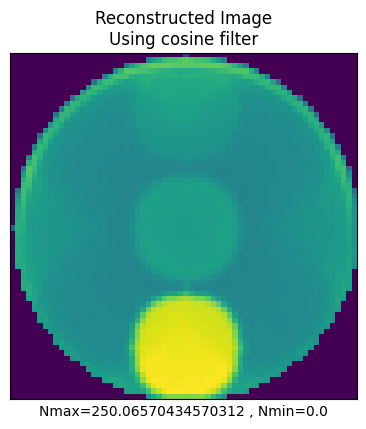

average_area= 0.782958984375


In [12]:
recon_cosine=iradon(sinogram, theta, filter_name= 'cosine')
recon_cosine=recon_cosine*255
a=np.max(recon_cosine)
b=np.min(recon_cosine)
a=round(a,5)
b=round(b,5)
print("1/NMAX value ",1/np.max(recon_cosine))
fig,(ax3) = plt.subplots(1,1, figsize=(8, 4.5))
ax3.imshow(recon_cosine)
ax3.set_title('Reconstructed Image\nUsing cosine filter')
ax3.set_xlabel(f"Nmax={a} , Nmin={b}")
ax3.set_yticks([])
ax3.set_xticks([])
plt.show()
average_area1 =np.count_nonzero(recon_cosine)/recon_cosine.size
print("average_area=",average_area1)

## **Hamming Filter**

1/NMAX value  0.004020068198111287


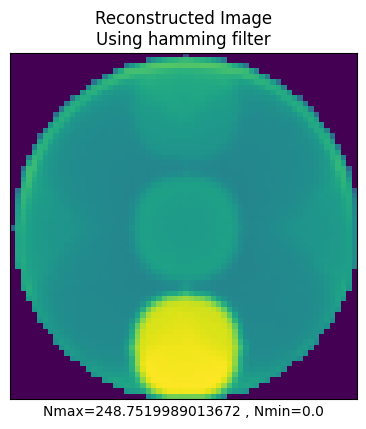

average_area= 0.782958984375


In [15]:
recon_hamming=iradon(sinogram, theta,filter_name= 'hamming')
recon_hamming=recon_hamming*255
a=np.max(recon_hamming)
b=np.min(recon_hamming)
print("1/NMAX value ",1/a)
a=round(a,5)
b=round(b,5)
fig,(ax3) = plt.subplots(1,1, figsize=(8, 4.5))
ax3.imshow(recon_hamming)
ax3.set_title('Reconstructed Image\nUsing hamming filter')
ax3.set_xlabel(f"Nmax={a} , Nmin={b}")
ax3.set_yticks([])
ax3.set_xticks([])
plt.show()
average_area =np.count_nonzero(recon_hamming)/recon_hamming.size
print("average_area=",average_area)

**Alligning Value in range of 0-255**

In [16]:
image=image*255

### **RMSE ERROR**

In [18]:
rmse_ramp = np.sqrt(np.mean((recon_ramp-image)**2))
rmse_sinc = np.sqrt(np.mean((recon_sine-image)**2))
rmse_cosine = np.sqrt(np.mean((recon_cosine-image)**2))
rmse_hamming = np.sqrt(np.mean((recon_hamming-image)**2))
rmse = [rmse_ramp, rmse_sinc, rmse_cosine, rmse_hamming]
print("RMSE value = ",rmse)

RMSE value =  [31.564917, 30.984037, 30.36223, 30.053995]
